In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import glob
import numpy as np
import random

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

import matplotlib.pyplot as plt

In [2]:
STOPWORDS = set(stopwords.words('english'))

In [121]:
bbc_dir = 'bbc-2/'
categories = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

news_text = []

for label, idx in categories.items():    
    for file_name in glob.glob(bbc_dir + label + '/*.txt'):
        with open(file_name, 'r', encoding='utf8', errors='ignore') as news_file:
            text = news_file.read()
            
            text_tokenized = word_tokenize(text)
            text_wo_stopword = [word for word in text_tokenized if not word in STOPWORDS]
            
            text = ' '.join(text_wo_stopword)
            
        news_text.append([text, idx])
        
random.shuffle(news_text)

In [122]:
text = [text[0] for text in news_text]
label = [label[1] for label in news_text]

train_size = int(len(news_text) * 0.8)

train_data = text[0: train_size]
train_labels = label[0: train_size]

test_data = text[train_size:]
test_labels = label[train_size:]

In [123]:
tokenizer = Tokenizer(5000, oov_token='<oov>')

tokenizer.fit_on_texts(text)

train_seq = tokenizer.texts_to_sequences(train_data)
train_pad = pad_sequences(train_seq, maxlen=300, padding='post', truncating='post')

test_seq = tokenizer.texts_to_sequences(test_data)
test_pad = pad_sequences(test_seq, maxlen=300, padding='post', truncating='post')

In [124]:
train_labels = np.array(train_labels)
train_labels = train_labels.reshape(1780, 1)
test_labels = np.array(test_labels)
test_labels = test_labels.reshape(445,1)

In [54]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

Epoch 1/10
56/56 [==============================] - 10s 178ms/step - loss: 1.4668 - accuracy: 0.3388 - val_loss: 1.3631 - val_accuracy: 0.3011
Epoch 2/10
56/56 [==============================] - 9s 164ms/step - loss: 1.0293 - accuracy: 0.5534 - val_loss: 0.7801 - val_accuracy: 0.7079
Epoch 3/10
56/56 [==============================] - 9s 156ms/step - loss: 0.6374 - accuracy: 0.7697 - val_loss: 0.6984 - val_accuracy: 0.8292
Epoch 4/10
56/56 [==============================] - 8s 138ms/step - loss: 0.3073 - accuracy: 0.9185 - val_loss: 0.3630 - val_accuracy: 0.8989
Epoch 5/10
56/56 [==============================] - 8s 152ms/step - loss: 0.1177 - accuracy: 0.9730 - val_loss: 0.2539 - val_accuracy: 0.9326
Epoch 6/10
56/56 [==============================] - 9s 168ms/step - loss: 0.0339 - accuracy: 0.9949 - val_loss: 0.2676 - val_accuracy: 0.9281
Epoch 7/10
56/56 [==============================] - 10s 184ms/step - loss: 0.0207 - accuracy: 0.9961 - val_loss: 0.2258 - val_accuracy: 0.9483
Epoc

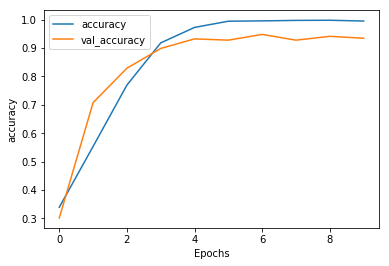

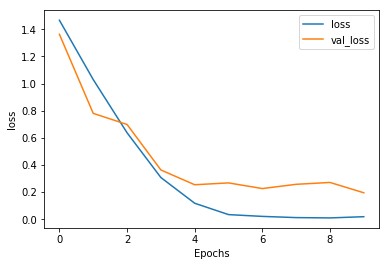

In [85]:
# With Stopwords
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_pad, train_labels, epochs=10, validation_data=(test_pad, test_labels))

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Epoch 1/10
56/56 [==============================] - 13s 226ms/step - loss: 1.5130 - accuracy: 0.3382 - val_loss: 1.2962 - val_accuracy: 0.5034
Epoch 2/10
56/56 [==============================] - 14s 244ms/step - loss: 0.7852 - accuracy: 0.6989 - val_loss: 0.5494 - val_accuracy: 0.8067
Epoch 3/10
56/56 [==============================] - 15s 262ms/step - loss: 0.1913 - accuracy: 0.9506 - val_loss: 0.2106 - val_accuracy: 0.9303
Epoch 4/10
56/56 [==============================] - 15s 270ms/step - loss: 0.0359 - accuracy: 0.9938 - val_loss: 0.2535 - val_accuracy: 0.9236
Epoch 5/10
56/56 [==============================] - 15s 271ms/step - loss: 0.0138 - accuracy: 0.9972 - val_loss: 0.1953 - val_accuracy: 0.9393
Epoch 6/10
56/56 [==============================] - 15s 269ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.2441 - val_accuracy: 0.9213
Epoch 7/10
56/56 [==============================] - 15s 267ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.2033 - val_accuracy: 0.9393

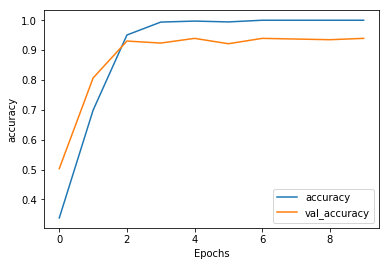

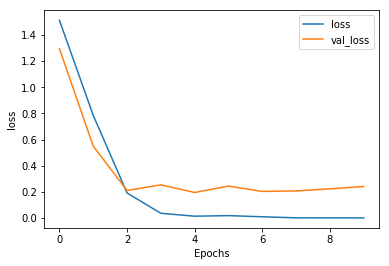

In [125]:
# Without Stopwords
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_pad, train_labels, epochs=10, validation_data=(test_pad, test_labels))

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Epoch 1/10
56/56 [==============================] - 27s 486ms/step - loss: 1.4508 - accuracy: 0.3410 - val_loss: 1.1703 - val_accuracy: 0.4382
Epoch 2/10
56/56 [==============================] - 37s 667ms/step - loss: 0.8486 - accuracy: 0.6635 - val_loss: 0.4583 - val_accuracy: 0.8584
Epoch 3/10
56/56 [==============================] - 38s 682ms/step - loss: 0.3108 - accuracy: 0.9152 - val_loss: 0.4465 - val_accuracy: 0.8921
Epoch 4/10
56/56 [==============================] - 34s 606ms/step - loss: 0.1383 - accuracy: 0.9713 - val_loss: 0.2909 - val_accuracy: 0.9326
Epoch 5/10
56/56 [==============================] - 36s 646ms/step - loss: 0.0481 - accuracy: 0.9933 - val_loss: 0.2840 - val_accuracy: 0.9348
Epoch 6/10
56/56 [==============================] - 37s 665ms/step - loss: 0.0269 - accuracy: 0.9944 - val_loss: 0.3132 - val_accuracy: 0.9371
Epoch 7/10
56/56 [==============================] - 38s 684ms/step - loss: 0.0225 - accuracy: 0.9961 - val_loss: 0.3469 - val_accuracy: 0.9303

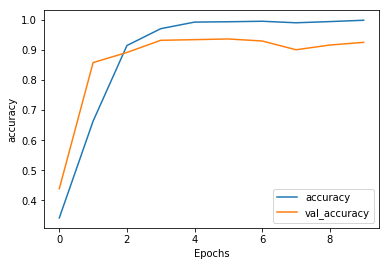

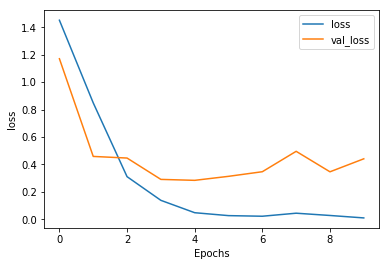

In [100]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(train_pad, train_labels, epochs=10, validation_data=(test_pad, test_labels))

plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")